### 2個類別的分類



### 線性可分的定義：
- 如果資料可以用一條直線（在2D空間）或一個超平面（在高維空間）完全分開，那麼這些資料就是線性可分的。
- 在這種情況下，使用線性模型（如線性SVM）是合適的。

### 如何判斷是否線性可分：
- 在2D空間中，我們可以通過視覺化來判斷
- 如果不同類別的點可以用一條直線分開，就是線性可分
- 如果不同類別的點交錯在一起，無法用直線分開，就是非線性可分

### 為什麼要使用線性模型：
- 為什麼要使用線性模型：
- 線性模型計算效率高
- 解釋性好
- 不容易過擬合
- 如果資料確實是線性可分的，線性模型就能得到很好的結果

### 如果資料不是線性可分的：
- 我們可以使用核化技巧（Kernel Trick）
- 將資料映射到更高維的空間，使其變得線性可分
- 常用的核函數包括：RBF核、多項式核等

Text(0, 0.5, 'Feature 1')

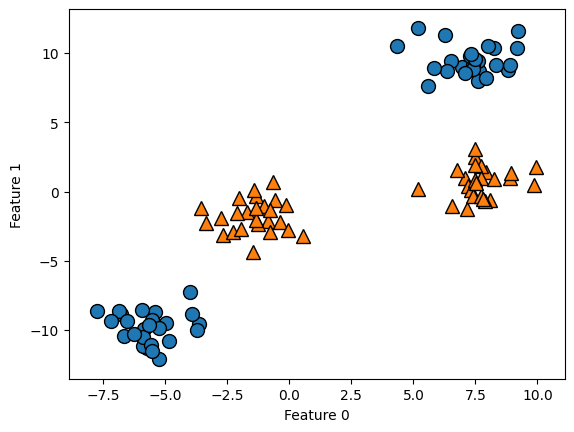

In [1]:
#資料集

from sklearn.datasets import make_blobs
import mglearn
import matplotlib.pyplot as plt

X,y = make_blobs(centers=4, random_state=8)
y = y % 2 #把4個分類改為2個分類

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

⬇︎線性分類模型只能用直線來區分點，因此無法很好地處理這個資料集

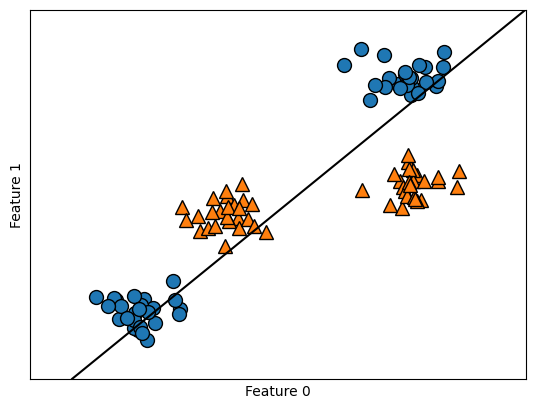

In [2]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

⬇︎現在讓我們擴展輸入特徵集，例如添加特徵 1 ** 2（第二個特徵的平方）作為新特徵。我們不再將每個資料點表示為二維點 (feature0, feature1)，而是將其表示為三維點 (feature0, feature1, feature1 ** 2)。以下是以三維散佈圖的形式展示了這種新的表示方式：

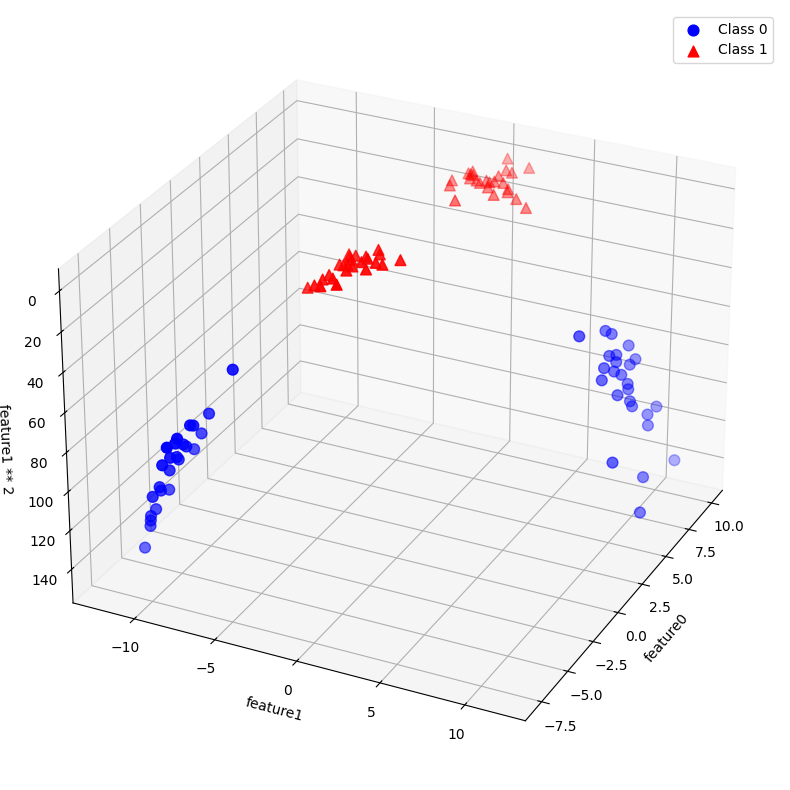

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
%matplotlib inline
# 生成数据
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

# 创建新的特征（添加平方项）
X_new = np.hstack([X, X[:, 1:] ** 2])

# 创建图形 - 修复的部分
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')  # 正确的创建3D图形的方式

# 设置视角
ax.view_init(elev=-152, azim=-26)

# 绘制数据点
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', s=60, label='Class 0')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', s=60, label='Class 1')

# 设置标签
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

# 添加图例
ax.legend()

# 显示图形
plt.tight_layout()
plt.show()

### 說明1


`np.hstack()` 是 NumPy 中的一個函數，用於水平堆疊（horizontal stacking）陣列。它的主要特點是：

1. **基本功能**：
   - 將多個陣列沿著水平方向（第二個軸，axis=1）連接在一起
   - 輸入的陣列必須具有相同的第一個維度（行數）

2. **語法**：
```python
np.hstack((array1, array2, ...))
```

3. **使用範例**：
```python
import numpy as np

# 範例1：一維陣列
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
result = np.hstack((a, b))  # 結果：[1, 2, 3, 4, 5, 6]

# 範例2：二維陣列
a = np.array([[1, 2], [3, 4]])
b = np.array([[5], [6]])
result = np.hstack((a, b))  # 結果：[[1, 2, 5], [3, 4, 6]]
```


```python
X_new = np.hstack([X, X[:, 1:] ** 2]) #如果只有X[:, 1],會只有1維,如果是X[:, 1:]會維持2維
```

這行程式碼的作用是：
1. `X` 是原始的特徵矩陣
2. `X[:, 1:]` 選取了 `X` 中除了第一列之外的所有列
3. `X[:, 1:] ** 2` 對選取的部分進行平方運算
4. `np.hstack()` 將原始矩陣 `X` 和平方後的特徵矩陣水平連接在一起

這種操作通常用於：
- 特徵工程
- 增加非線性特徵
- 在機器學習中擴展特徵空間

例如，如果 `X` 是一個 3x2 的矩陣：
```python
X = np.array([[1, 2],
              [3, 4],
              [5, 6]])
```

執行 `X_new = np.hstack([X, X[:, 1:] ** 2])` 後，`X_new` 會變成：
```python
X_new = np.array([[1, 2, 4],    # 4 是 2 的平方
                  [3, 4, 16],   # 16 是 4 的平方
                  [5, 6, 36]])  # 36 是 6 的平方
```

這種操作在核化支援向量機（Kernel SVM）中特別有用，因為它可以幫助模型捕捉特徵之間的非線性關係。


In [4]:
# import numpy as np
# X = np.array([[1, 2],
#               [3, 4],
#               [5, 6]])
#X_new = np.hstack([X, X[:, 1:] ** 2])
#X_new



Text(0.5, 0, 'feature0 ** 2')

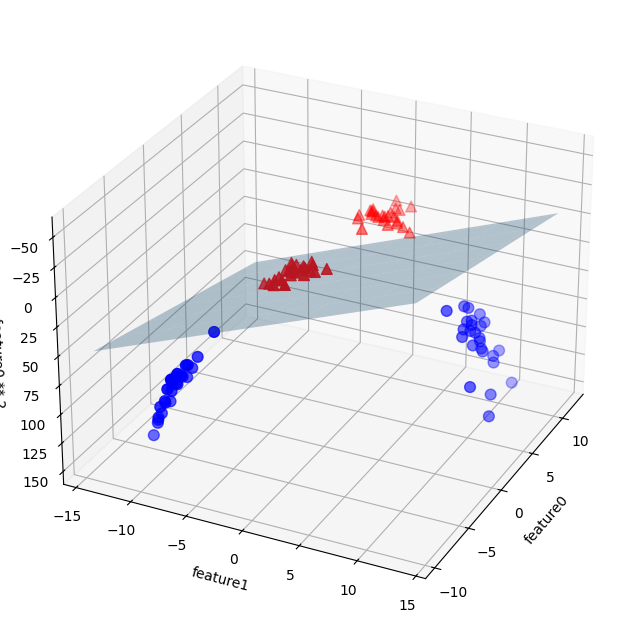

In [5]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# show linear decision boundary
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')  # 正确的创建3D图形的方式

# 设置视角
ax.view_init(elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature0 ** 2")

Text(0, 0.5, 'Feature 1')

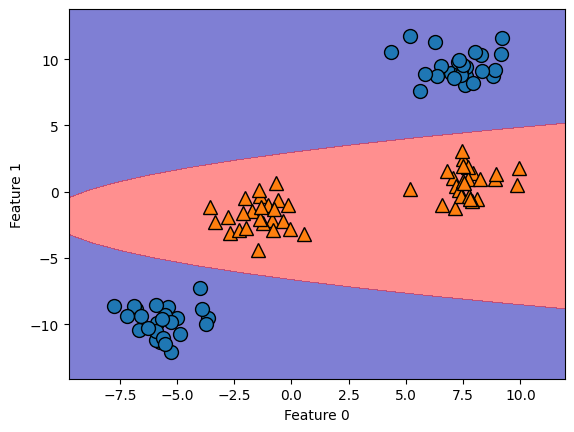

In [6]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

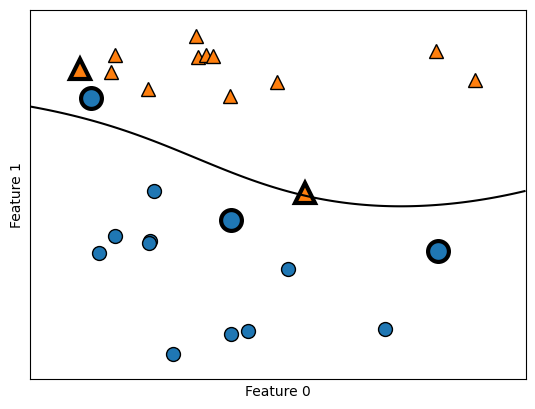

In [7]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

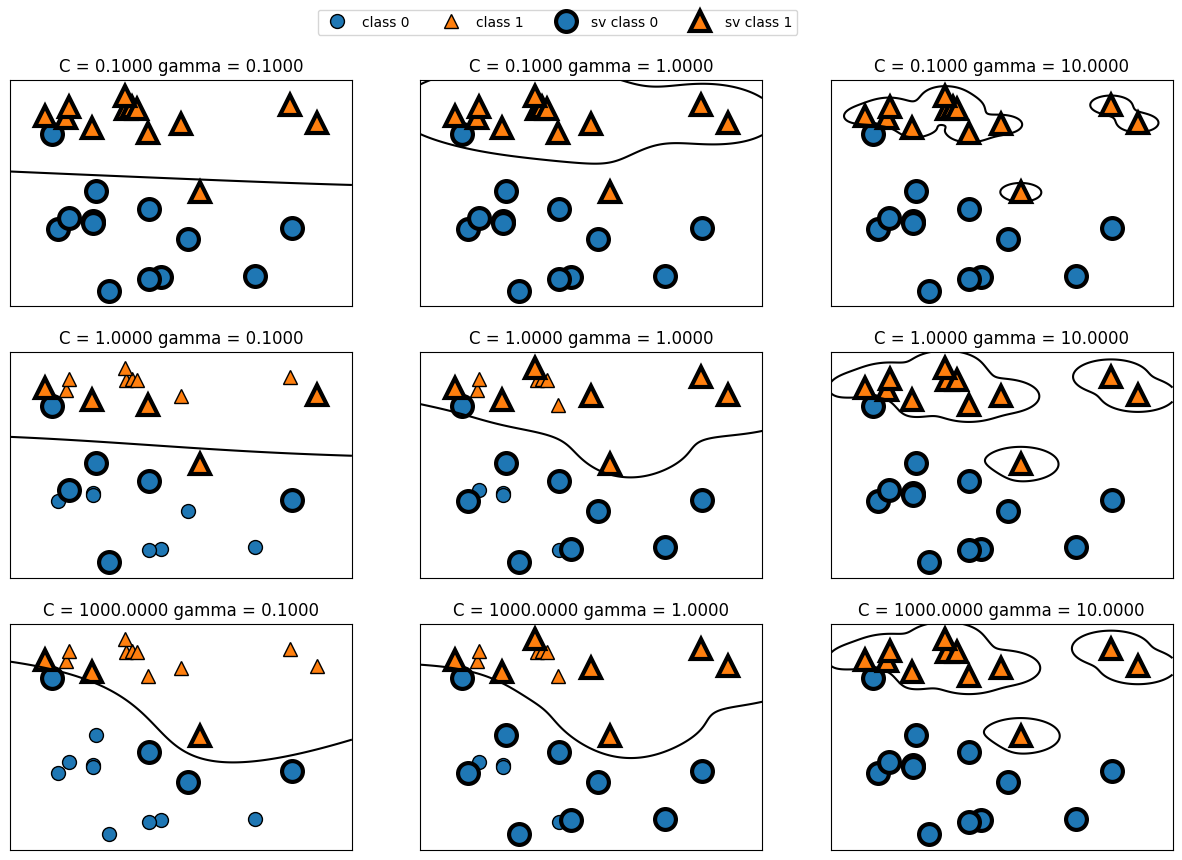

In [8]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
ncol=4, loc=(.9, 1.2))